Thực hành 3 : Biến đổi hình học


1. VIẾT CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH

1.1 Chọn đối tượng trong ảnh

Kích thước ảnh gốc: (1427, 2100, 3)


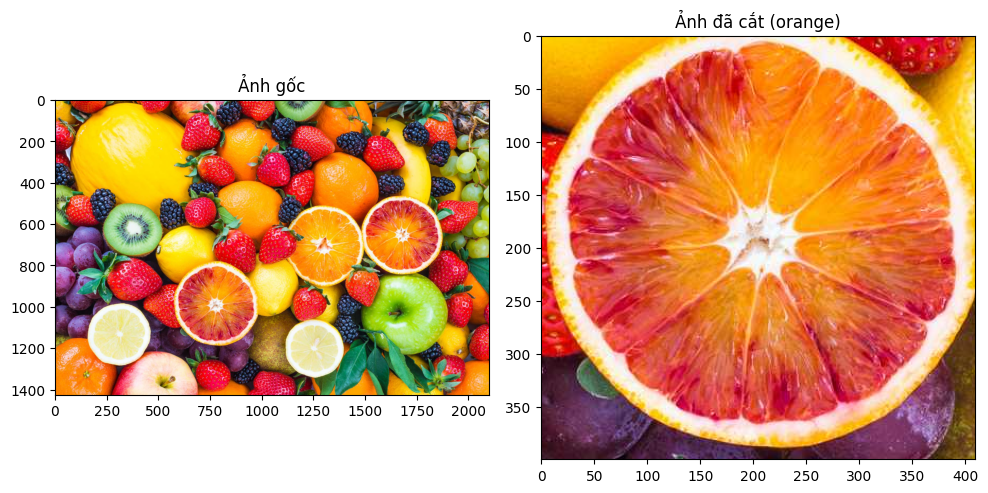

In [9]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print("Kích thước ảnh gốc:", data.shape)

bmg = data[800:1200, 570:980]
iio.imsave('orange.jpg', bmg)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title("Ảnh gốc")

plt.subplot(1, 2, 2)
plt.imshow(bmg)
plt.title("Ảnh đã cắt (orange)")

plt.tight_layout()
plt.show()

1.2 Tịnh tiến đơn

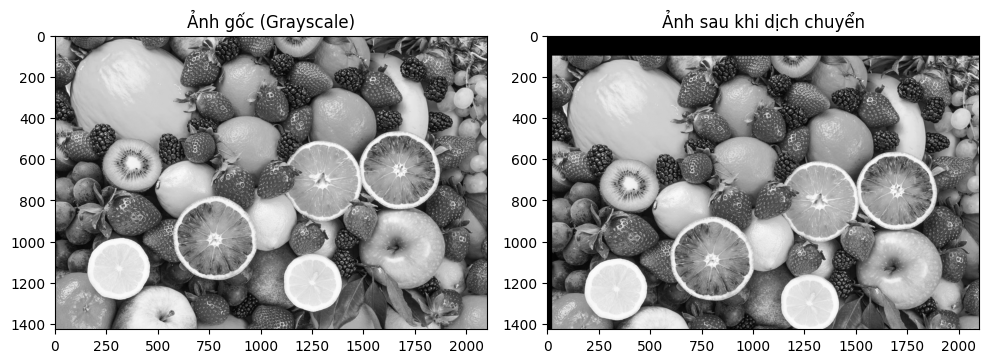

In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, shift=(100, 25))

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Ảnh gốc (Grayscale)')

plt.subplot(1, 2, 2)
plt.imshow(bdata, cmap='gray')
plt.title('Ảnh sau khi dịch chuyển')

plt.tight_layout()
plt.show()

1.3 Thay đổi kích thước ảnh 

Kích thước ảnh gốc: (1427, 2100, 3)
Kích thước ảnh phóng to toàn phần: (2854, 4200, 6)
Kích thước ảnh phóng to chiều cao và rộng: (2854, 4200, 3)
Kích thước ảnh đã thu nhỏ: (714, 1890, 3)


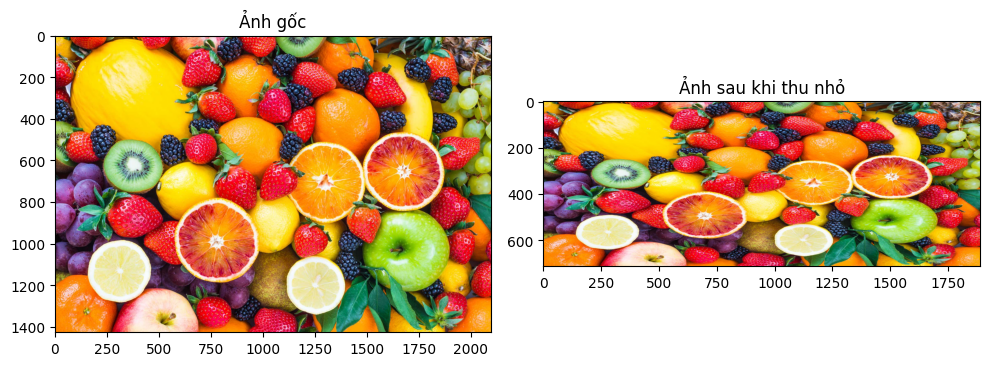

In [13]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('fruit.jpg')
print("Kích thước ảnh gốc:", data.shape)

bdata = nd.zoom(data, 2)
print("Kích thước ảnh phóng to toàn phần:", bdata.shape)

data2 = nd.zoom(data, (2, 2, 1))
print("Kích thước ảnh phóng to chiều cao và rộng:", data2.shape)

data3 = nd.zoom(data, (0.5, 0.9, 1))
print("Kích thước ảnh đã thu nhỏ:", data3.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.title("Ảnh gốc")

plt.subplot(1, 2, 2)
plt.imshow(data3.astype(np.uint8))
plt.title("Ảnh sau khi thu nhỏ")

plt.tight_layout()
plt.show()

1.4 Xoay ảnh

Kích thước ảnh gốc: (1427, 2100, 3)


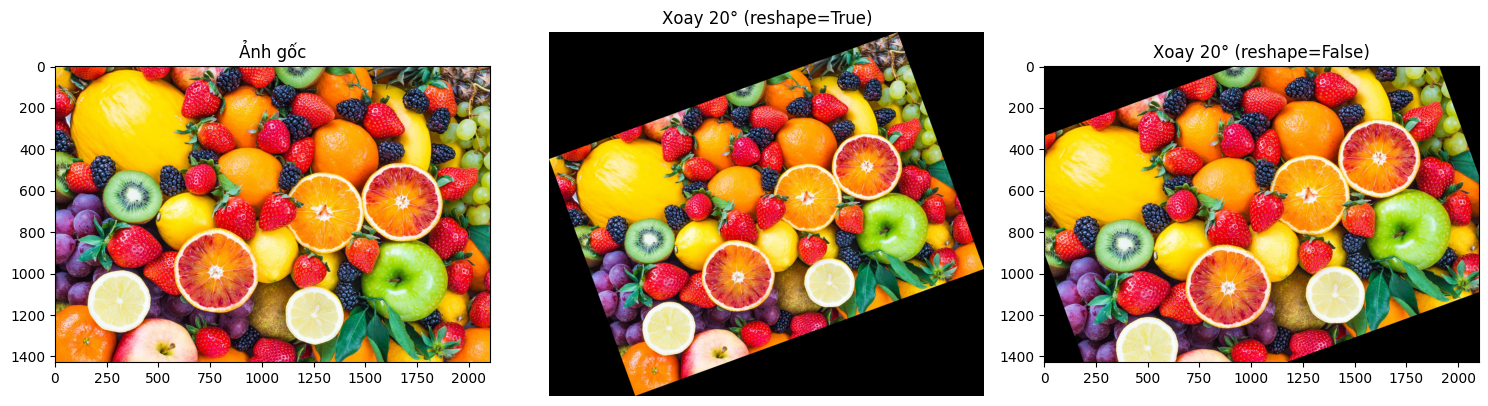

In [15]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('fruit.jpg')
print("Kích thước ảnh gốc:", data.shape)

d1 = nd.rotate(data, 20)

d2 = nd.rotate(data, 20, reshape=False)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(data)
plt.title("Ảnh gốc")

plt.subplot(1, 3, 2)
plt.imshow(d1.astype(np.uint8))
plt.title("Xoay 20° (reshape=True)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(d2.astype(np.uint8))
plt.title("Xoay 20° (reshape=False)")

plt.tight_layout()
plt.show()

1.5 Dilation và Erosion

Kích thước ảnh gốc: (309, 515)


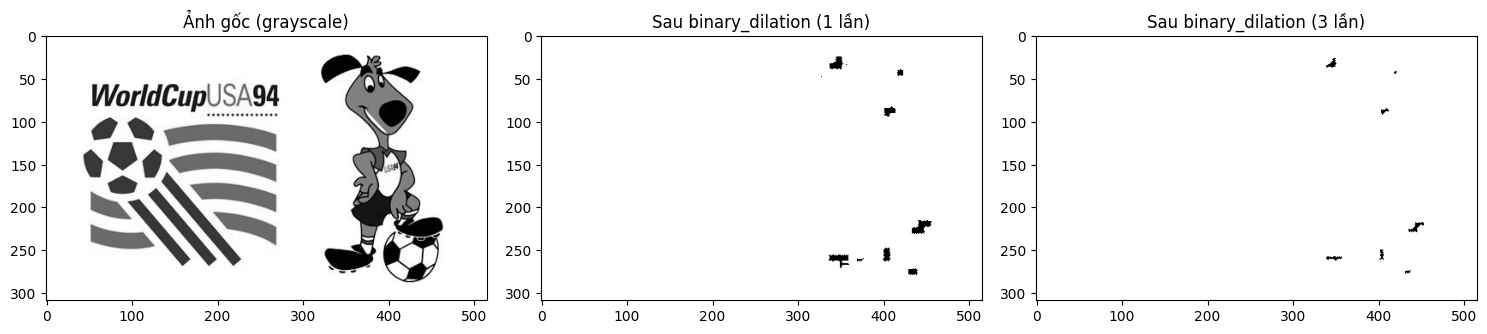

In [18]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('world_cup.jpg', mode='F')
print("Kích thước ảnh gốc:", data.shape)

binary_data = data > 0.5

d1 = nd.binary_dilation(binary_data)
d2 = nd.binary_dilation(binary_data, iterations=3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc (grayscale)")

plt.subplot(1, 3, 2)
plt.imshow(d1, cmap='gray')
plt.title("Sau binary_dilation (1 lần)")

plt.subplot(1, 3, 3)
plt.imshow(d2, cmap='gray')
plt.title("Sau binary_dilation (3 lần)")

plt.tight_layout()
plt.show()

1.6 Coordinate Mapping

Kích thước ảnh gốc: (309, 515)


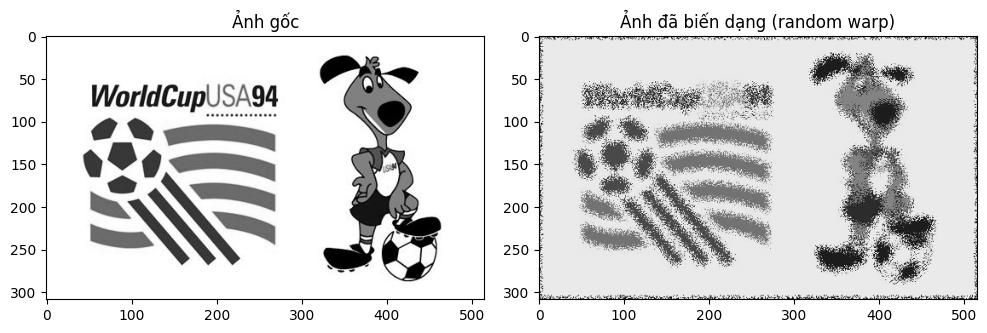

In [23]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('world_cup.jpg', mode='F')
print("Kích thước ảnh gốc:", data.shape)

V, H = data.shape

M = np.indices((V, H))

d = 5
q = 2 * d * np.random.rand(*M.shape) - d

mp = M + q

d1 = nd.map_coordinates(data, mp)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")

plt.subplot(1, 2, 2)
plt.imshow(d1, cmap='gray')
plt.title("Ảnh đã biến dạng (random warp)")

plt.tight_layout()
plt.show()

1.7 Biến đổi chung (Generic Transformation)

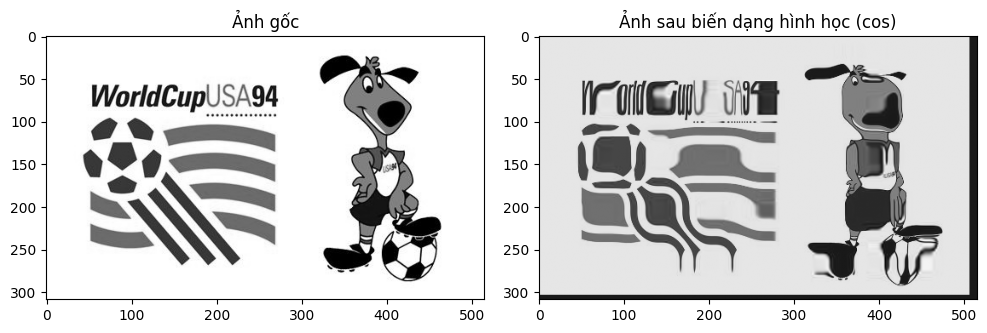

In [25]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def GeoFun(outcoord) :
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a,b
data = iio.imread('world_cup.jpg', mode='F')

d1 = nd.geometric_transform(data, GeoFun)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")

plt.subplot(1, 2, 2)
plt.imshow(d1, cmap='gray')
plt.title("Ảnh sau biến dạng hình học (cos)")

plt.tight_layout()
plt.show()